In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_testing import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [2]:
c0 = np.load('../NecroptosisSens/cluster0/necro_pars10k_cluster0_5720_mod.npy')
c1 = np.load('../NecroptosisSens/cluster1/necro_pars10k_cluster1_5720_mod.npy')
c2 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')
c3 = np.load('../NecroptosisSens/cluster3/necro_pars10k_cluster3_5720_mod.npy')

In [5]:
print(len(c3))

2822


In [ ]:
print(c2[0])

In [ ]:
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')[:,14:]
mode2_100 = np.log10(mode2_100)
tspan = np.linspace(0, 1440, 500)

In [ ]:
mode2_100[0]

In [ ]:
print(mode2_100[0])

In [ ]:
clus1 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')[:,14:]

In [ ]:
n_pars = len(mode2_100)
all_pars = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = mode2_100[i]
    param_values[rate_mask] = 10**par
    all_pars[i] = param_values

In [ ]:
all_pars[0]

In [ ]:
all_pars[0]

In [ ]:
list(model.initial_conditions)

In [7]:
tspan2 = np.linspace(0,1800,500)

In [8]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=c1, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-09 15:40:30.965 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Simulator created
2022-01-09 15:40:31.675 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Equation mode set to "cython"
2022-01-09 15:40:31.760 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] Simulation(s) started
2022-01-09 15:40:31.864 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Multi-processor (parallel) mode using 20 processes
2022-01-09 15:41:29.033 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] All simulation(s) complete
2022-01-09 15:41:29.035 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor started
2022-01-09 15:41:29.845 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor finished


In [9]:
solverwtm2 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm2  = solverwtm2.run(param_values=c2, num_processors = 20)
mode1df_wtm2 = mode1wtm2.dataframe

2022-01-09 15:41:31.068 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Simulator created
2022-01-09 15:41:31.073 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Equation mode set to "cython"
2022-01-09 15:41:31.107 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] Simulation(s) started
2022-01-09 15:41:31.241 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Multi-processor (parallel) mode using 20 processes
2022-01-09 15:43:07.119 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] All simulation(s) complete
2022-01-09 15:43:07.121 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor started
2022-01-09 15:43:08.189 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor finished


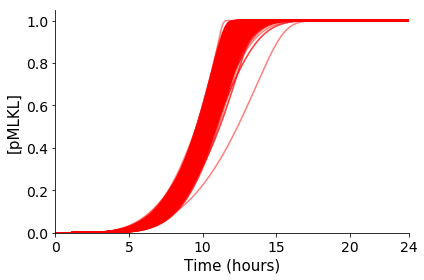

In [10]:
fig, ax = plt.subplots()
for n in range(len(c1)):
    plt.plot(tspan2/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'red', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

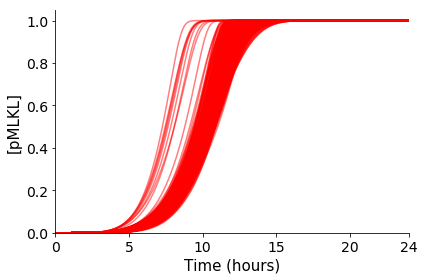

In [11]:
fig, ax = plt.subplots()
for n in range(len(c2)):
    plt.plot(tspan2/60, mode1df_wtm2.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'red', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [ ]:
m1 = model.monomers
mlkltot = mode1wtm1.observable(m1.MLKL())
for item in mlkltot.items():
    print(item)
# plt.figure()
# for n in mlkltot: 
#     plt.plot(tspan2/60, mlkltot[n], lw=1.5, 
#              zorder = 1, color = 'red', alpha = 0.5) 
# plt.show()    

In [12]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):310},
                                        param_values=c2, num_processors = 20)
mode1df_wtm1kd = mode1wtm1.dataframe

2022-01-09 15:54:34.229 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Simulator created
2022-01-09 15:54:34.239 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Equation mode set to "cython"
2022-01-09 15:54:34.310 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] Simulation(s) started
2022-01-09 15:54:34.466 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Multi-processor (parallel) mode using 20 processes
2022-01-09 15:56:07.039 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] All simulation(s) complete
2022-01-09 15:56:07.041 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor started
2022-01-09 15:56:08.062 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor finished


In [ ]:
mode1wtm1.save('../../model_analysis/h5_files/mode4_allpars_sens_faddoekd.h5',include_obs_exprs=True)

In [ ]:
faddkd = SimulationResult.load('../../model_analysis/h5_files/mode4_allpars_sens_faddoekd.h5')

In [ ]:
plt.figure()
for i in range(len(all_pars)):
    plt.plot(tspan2/60, faddkd.observables['MLKLa_obs'])

In [13]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(initials = {m.FADD(bDD=None, bDED1=None, bDED2=None):31090},
                                        param_values=c2, num_processors = 20)
mode1df_wtm1oe = mode1wtm1.dataframe

2022-01-09 15:56:09.765 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Simulator created
2022-01-09 15:56:09.770 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Equation mode set to "cython"
2022-01-09 15:56:09.803 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] Simulation(s) started
2022-01-09 15:56:09.926 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] Multi-processor (parallel) mode using 20 processes
2022-01-09 15:57:41.445 - pysb.simulator.scipyode - INFO - [model_files.nerm_testing] All simulation(s) complete
2022-01-09 15:57:41.447 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor started
2022-01-09 15:57:42.505 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_testing] SimulationResult constructor finished


In [ ]:
fig, ax = plt.subplots()
for n in range(len(all_pars)):
    plt.plot(tspan2/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:].max(), lw=1.5, 
             zorder = 1, color = 'red', alpha = 0.5) 
#     plt.plot(tspan2/60, mode1df_wtm1kd.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, 
#              zorder = 1, color =  'blue', alpha = 0.3)
#     plt.plot(tspan2/60, mode1df_wtm1oe.loc[n]['MLKLa_obs'], lw=1.5, 
#              zorder = 1, color = 'green', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [17]:
thresh = 2772
ttd = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm2.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd.append(mode1df_wtm2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd.append(np.inf)
for i in range(len(ttd)):
    if ttd[i] == np.inf:
        ttd[i] = 2100            
print()        
# print(ttd)
print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])        


2042


In [18]:
thresh = 2772
ttdkd = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm1kd.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdkd.append(mode1df_wtm1kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdkd.append(np.inf)
for i in range(len(ttdkd)):
    if ttdkd[i] == np.inf:
        ttdkd[i] = 2100            
print()        
# print(ttdkd)
print(len(ttdkd))
# print('TTD = ', m3alldf100wt['time'][idx])        


2042


In [19]:
thresh = 2772
ttdoe = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm1oe.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdoe.append(mode1df_wtm1oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdoe.append(np.inf)
for i in range(len(ttdoe)):
    if ttdoe[i] == np.inf:
        ttdoe[i] = 2100            
print()        
print(len(ttdoe))
# print('TTD = ', m3alldf100wt['time'][idx])        


2042


In [20]:
mode2dfn = pd.DataFrame({'WT': ttd,
                            'KD': ttdkd,
                          'OE': ttdoe})
framesm4 = [mode2dfn]
dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['WT','KD','OE'])
dfm4fadd = pd.melt(dfclus4)

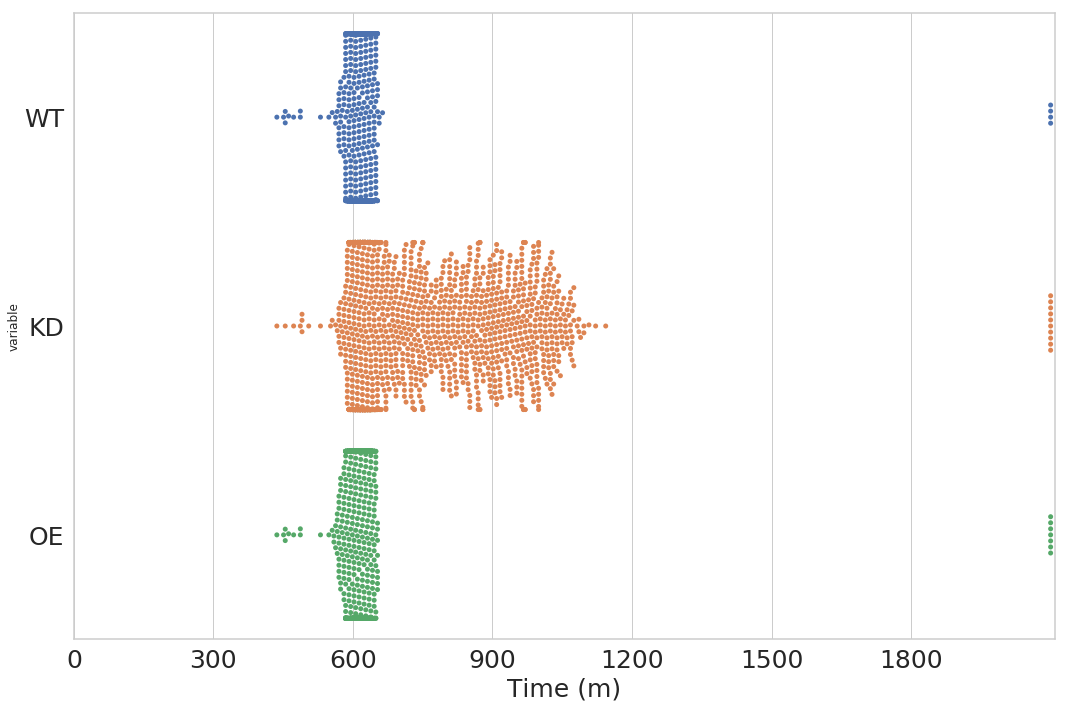

In [25]:
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "KD": "lightcoral", "OE":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm4fadd, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2110, xmin = 1)
ax.set_xticks([0,300, 600, 900, 1200,1500, 1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [26]:
for i,t in enumerate(tspan2):
    print(i,":",t)

0 : 0.0
1 : 3.6072144288577155
2 : 7.214428857715431
3 : 10.821643286573146
4 : 14.428857715430862
5 : 18.03607214428858
6 : 21.64328657314629
7 : 25.250501002004007
8 : 28.857715430861724
9 : 32.46492985971944
10 : 36.07214428857716
11 : 39.67935871743487
12 : 43.28657314629258
13 : 46.8937875751503
14 : 50.501002004008015
15 : 54.10821643286573
16 : 57.71543086172345
17 : 61.322645290581164
18 : 64.92985971943888
19 : 68.5370741482966
20 : 72.14428857715431
21 : 75.75150300601203
22 : 79.35871743486975
23 : 82.96593186372746
24 : 86.57314629258516
25 : 90.18036072144288
26 : 93.7875751503006
27 : 97.39478957915831
28 : 101.00200400801603
29 : 104.60921843687375
30 : 108.21643286573146
31 : 111.82364729458918
32 : 115.4308617234469
33 : 119.03807615230461
34 : 122.64529058116233
35 : 126.25250501002004
36 : 129.85971943887776
37 : 133.46693386773546
38 : 137.0741482965932
39 : 140.6813627254509
40 : 144.28857715430863
41 : 147.89579158316633
42 : 151.50300601202406
43 : 155.1102204408

In [31]:
sim_idx_faddkd = [idx for idx in range(len(c2)) if mode1df_wtm1kd['MLKLa_obs'][idx].iloc[222] <= 2772 and 
                 mode1df_wtm1kd['MLKLa_obs'][idx].iloc[250] > 2772]
print(sim_idx_faddkd)

[175, 210, 212, 215, 229, 239, 242, 246, 247, 248, 256, 261, 265, 267, 268, 269, 270, 273, 274, 275, 291, 295, 306, 308, 312, 316, 318, 337, 338, 350, 354, 364, 368, 379, 395, 396, 407, 414, 416, 422, 428, 429, 439, 440, 441, 458, 469, 490, 496, 507, 514, 528, 541, 545, 551, 557, 575, 577, 580, 596, 597, 601, 602, 604, 606, 610, 614, 616, 638, 650, 651, 676, 720, 723, 730, 742, 746, 778, 783, 807, 817, 822, 829, 830, 833, 852, 856, 867, 868, 873, 878, 884, 894, 911, 916, 920, 921, 926, 941, 946, 947, 954, 976, 979, 983, 1006, 1017, 1018, 1030, 1040, 1060, 1071, 1072, 1076, 1077, 1091, 1100, 1119, 1124, 1145, 1147, 1157, 1159, 1162, 1180, 1184, 1191, 1193, 1199, 1201, 1213, 1214, 1215, 1225, 1236, 1237, 1242, 1260, 1261, 1262, 1271, 1273, 1300, 1311, 1387, 1389, 1398, 1429, 1436, 1466, 1473, 1476, 1477, 1483, 1524, 1578, 1580, 1594, 1610, 1614, 1639, 1644, 1655, 1658, 1660, 1663, 1671, 1688, 1690, 1692, 1699, 1703, 1704, 1721, 1724, 1725, 1726, 1736, 1739, 1742, 1746, 1752, 1753, 1754, 

In [ ]:
threshold2 = 2772

In [ ]:
df_threshtimeswt = mode1df_wtm1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimeskd   = mode1df_wtm1kd.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesoe = mode1df_wtm1oe.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
import seaborn as sns #fadd
plt.figure(figsize = (9,6))
sns.stripplot(data=dfm4fadd, y="species", x="value", hue="variable", dodge=True, 
              orient = 'h',linewidth=0.5,size=7)
plt.xlim(xmin = 1, xmax = 1800)
plt.legend(loc = 'lower right')

In [ ]:
df_threshtimeskdnew['MLKLa_obs']

In [ ]:
mode2wt = pd.DataFrame({'KD': df_threshtimeskdnew['MLKLa_obs'],
                       'species':'wt'})
dfclus4 = pd.DataFrame(data = pd.DataFrame(mode2wt), columns = ['species','WT'])
dfm4wt = pd.melt(dfclus4, id_vars=["species"])

In [ ]:
plt.figure()
sns.stripplot(data=dfm4wt, y="species", x="value", hue="variable", dodge=True, orient = 'h')
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
for i,t in enumerate(np.linspace(0,1440,500)):
    print(i,":",t)

In [ ]:
sim_idx_a20ko = [idx for idx in range(len(all_pars)) if mode1df_wtm1['MLKLa_obs'][idx].iloc[193] < 2772]
print(len(sim_idx_a20ko))